In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("nulls_outliers_dataset.xlsx")

In [3]:
df

,Name,Age,Salary,Department,Joining_Date,Performance_Score,Email
0,Employee_0,39.0,90990.331549,Engineering,2010-01-01,4.034008,employee0@company.com
1,Employee_1,33.0,83869.505244,NaN,2010-01-02,NaN,employee1@company.com
2,Employee_2,41.0,70894.455549,Engineering,2010-01-03,1.828969,employee2@company.com
3,NaN,50.0,60295.948334,Sales,2010-01-04,3.852943,NaN
4,NaN,32.0,NaN,NaN,2010-01-05,2.546481,employee4@company.com
...,...,...,...,...,...,...,...
995,Employee_995,32.0,NaN,Finance,2012-09-22,4.580261,employee995@company.com
996,Employee_996,52.0,69602.181111,NaN,2012-09-23,1.596563,employee996@company.com
997,Employee_997,41.0,56771.880232,Marketing,2012-09-24,4.143701,employee997@company.com
998,Employee_998,29.0,67553.995541,Marketing,2012-09-25,3.471726,employee998@company.com


In [4]:
df.head()

,Name,Age,Salary,Department,Joining_Date,Performance_Score,Email
0,Employee_0,39.0,90990.331549,Engineering,2010-01-01,4.034008,employee0@company.com
1,Employee_1,33.0,83869.505244,NaN,2010-01-02,NaN,employee1@company.com
2,Employee_2,41.0,70894.455549,Engineering,2010-01-03,1.828969,employee2@company.com
3,NaN,50.0,60295.948334,Sales,2010-01-04,3.852943,NaN
4,NaN,32.0,NaN,NaN,2010-01-05,2.546481,employee4@company.com


In [5]:
df.tail()

,Name,Age,Salary,Department,Joining_Date,Performance_Score,Email
995,Employee_995,32.0,NaN,Finance,2012-09-22,4.580261,employee995@company.com
996,Employee_996,52.0,69602.181111,NaN,2012-09-23,1.596563,employee996@company.com
997,Employee_997,41.0,56771.880232,Marketing,2012-09-24,4.143701,employee997@company.com
998,Employee_998,29.0,67553.995541,Marketing,2012-09-25,3.471726,employee998@company.com
999,NaN,40.0,58826.460328,Finance,NaT,2.367389,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               900 non-null    object        
 1   Age                900 non-null    float64       
 2   Salary             901 non-null    float64       
 3   Department         900 non-null    object        
 4   Joining_Date       900 non-null    datetime64[ns]
 5   Performance_Score  902 non-null    float64       
 6   Email              900 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 54.8+ KB


In [7]:
df.isnull().sum()

Name                 100
Age                  100
Salary                99
Department           100
Joining_Date         100
Performance_Score     98
Email                100
dtype: int64

In [8]:
df.shape

(1000, 7)

In [9]:
df.columns

Index(['Name', 'Age', 'Salary', 'Department', 'Joining_Date',
       'Performance_Score', 'Email'],
      dtype='object')

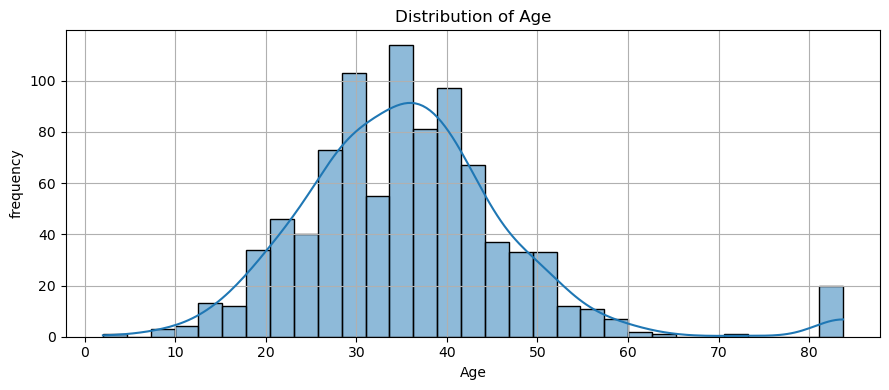

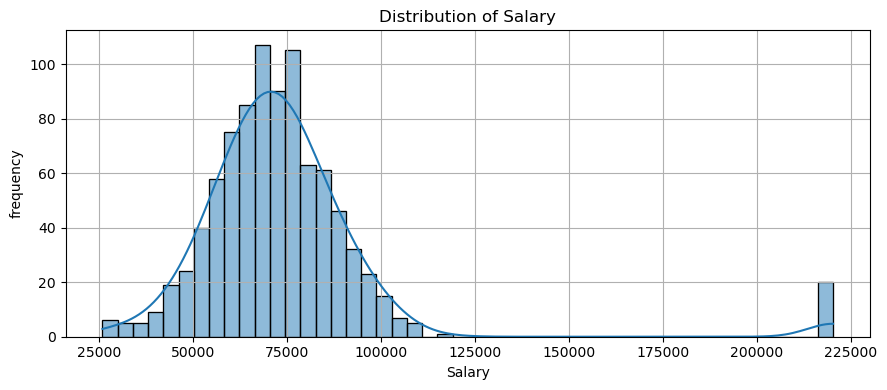

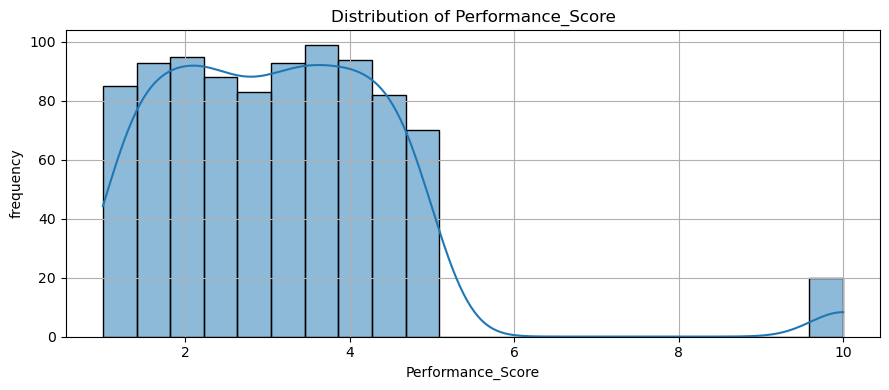

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
columns=[ 'Age', 'Salary','Performance_Score',]
for col in columns:
    plt.figure(figsize=(9,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [12]:
df.isnull().sum()

Name                 100
Age                    0
Salary                99
Department           100
Joining_Date         100
Performance_Score     98
Email                100
dtype: int64

In [13]:
df["Salary"]=df["Salary"].fillna(df["Salary"].median())

In [14]:
df["Performance_Score"]=df["Performance_Score"].fillna(df["Performance_Score"].median())

In [15]:
df.isnull().sum()

Name                 100
Age                    0
Salary                 0
Department           100
Joining_Date         100
Performance_Score      0
Email                100
dtype: int64

In [16]:
#outliers 
col="Age"
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
LOWER_BOUND = Q1-1.5*IQR
UPPER_BOUND = Q3+1.5*IQR
outliers = df[(df[col] < LOWER_BOUND) | (df[col] > UPPER_BOUND)] 
print(outliers.shape[0])

33


In [17]:
#outliers 
col="Salary"
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
LOWER_BOUND = Q1-1.5*IQR
UPPER_BOUND = Q3+1.5*IQR
outliers = df[(df[col] < LOWER_BOUND) | (df[col] > UPPER_BOUND)] 
print(outliers.shape[0])

40


In [18]:
#outliers 
col="Performance_Score"
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
LOWER_BOUND = Q1-1.5*IQR
UPPER_BOUND = Q3+1.5*IQR
outliers = df[(df[col] < LOWER_BOUND) | (df[col] > UPPER_BOUND)] 
print(outliers.shape[0])

20


In [21]:
df.to_csv("nulls_outliers-2024-cleaned.csv", index=False)